In [40]:
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'grid.color': 'white', 'grid.linewidth':1})
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
pathforPK = "/Users/sgkang/Google Drive/Zarcfit/nt01222a.z"
pathfordata = "../data/Kimberlite-2015-07-17.xls"
temp = np.loadtxt(pathforPK, skiprows=11, delimiter=",")
data = pd.read_excel(pathfordata)
data_active = data.loc[np.logical_and((data['Facies'] == 'XVK')|(data['Facies'] == 'PK')|(data['Facies'] == 'HK')|(data['Facies'] == 'VK'), data.notnull()['Rinf']==True)][["Facies", "0LabID (PCG)", "Peregrine ID", "(Latitude)", "(Longitude)", "Depth (m)","Mag Susc [SI]","Resistivity [Ohm.m]","Geometric Factor [m]","Sat Geometric Dens [g/cc]","Chargeability [ms]","Rinf","Linf","Ro","Rh","Qh","Ph", "Fh","pRh", "pQh","Rm","Qm","Pm", "Fm","pRm", "pQm","Rl","Ql","Pl", "Fl", "pRl", "pQl","Re","Qe","Pe-f","Pe-i"]]

In [28]:
data_active[data['Facies'] == 'XVK']

/Users/sgkang/anaconda/envs/py3/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,Facies,0LabID (PCG),Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Geometric Factor [m],Sat Geometric Dens [g/cc],...,Rl,Ql,Pl,Fl,pRl,pQl,Re,Qe,Pe-f,Pe-i
43,XVK,NT01222,K2P-0017,64.332627,-109.816663,174.1,0.000582,17.317279,0.021990,2.258028,...,302,5.039e-06,0.6464,3635,1272,7.383e-07,10000000000,0.005847,0.3518,0.7189
45,XVK,NT01223,K2P-0020,64.332627,-109.816663,204.5,0.000636,31.009713,0.021792,2.287620,...,582.8,3.038e-06,0.6517,2656,2058,5.084e-07,10000000000,0.003093,0.2073,-2.149
47,XVK,NT01224,K2P-0024,64.332627,-109.816663,235.0,0.000951,56.755824,0.021474,1.976504,...,1193,3.057e-06,0.5644,3322,3226,6.21e-07,10000000000,0.00097,0.1622,-2.037
49,XVK,NT01225,K2P-0031,64.332627,-109.816663,298.7,0.000287,15.608231,0.022568,2.218582,...,404.3,4.406e-06,0.6611,2293,499,1.492e-06,10000000000,0.005015,0.1692,-2.215
55,XVK,NT01228,K2P-0077,NaN,NaN,117.4,0.001884,77.892755,0.022312,2.416544,...,689.7,1.121e-05,0.5675,837.3,14210,4.365e-07,10000000000,0.001363,0.66,-2.347
57,XVK,NT01229,K2P-0147,64.332107,-109.815671,169.7,0.000851,15.092644,0.024129,2.005562,...,409.2,4.285e-06,0.6811,1771,339.6,1.809e-06,10000000000,0.006881,0.2626,0.6353
59,XVK,NT01230,K2P-0157,64.332107,-109.815671,265.9,0.001072,81.146257,0.025534,1.562988,...,1715,1.801e-06,0.5704,4005,2725,5.228e-07,10000000000,0.002796,0.1696,0.6351
60,XVK,NT01230,K2P-0157,64.332107,-109.815671,265.9,0.001110,49.144266,0.021891,1.747999,...,1008,4.69e-06,0.5254,4242,2767,9.43e-07,10000000000,0.008176,0.167,0.6575


In [29]:
labid = 'NT01222'

In [34]:
Linf = data_active[data['0LabID (PCG)'] == labid]['Linf'].values[0]

Rinf = data_active[data['0LabID (PCG)'] == labid]['Rinf'].values[0]
Rh = data_active[data['0LabID (PCG)'] == labid]['Rh'].values[0]
Qh = data_active[data['0LabID (PCG)'] == labid]['Qh'].values[0]
Ph = data_active[data['0LabID (PCG)'] == labid]['Ph'].values[0]
Fh = data_active[data['0LabID (PCG)'] == labid]['Fh'].values[0]

Rm = data_active[data['0LabID (PCG)'] == labid]['Rm'].values[0]
Qm = data_active[data['0LabID (PCG)'] == labid]['Qm'].values[0]
Pm = data_active[data['0LabID (PCG)'] == labid]['Pm'].values[0]
Fm = data_active[data['0LabID (PCG)'] == labid]['Fm'].values[0]

Rl = data_active[data['0LabID (PCG)'] == labid]['Rl'].values[0]
Ql = data_active[data['0LabID (PCG)'] == labid]['Ql'].values[0]
Pl = data_active[data['0LabID (PCG)'] == labid]['Pl'].values[0]
Fl = data_active[data['0LabID (PCG)'] == labid]['Fl'].values[0]

Re = data_active[data['0LabID (PCG)'] == labid]['Re'].values[0]
Qe = data_active[data['0LabID (PCG)'] == labid]['Qe'].values[0]

Pef = data_active[data['0LabID (PCG)'] == labid]['Pe-f'].values[0]
Pei = data_active[data['0LabID (PCG)'] == labid]['Pe-i'].values[0]

/Users/sgkang/anaconda/envs/py3/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [35]:
import sys 
sys.path.append("../codes/")
from Zarcfit import *

In [37]:
# observed impedance
obs = temp[:,4]+1j*temp[:,5]
# frequency
frequency = temp[:,0].copy()
# Initiate Zarfit
zarc = Zarcfit(obs, frequency)
zarc.SetParametersSeries(Linf, Rinf, Rh, Fh, Ph, Rl, Fl, Pl, Rm, Fm, Pm, Re, Qe, Pef, Pei)
predS = zarc.Zseries(frequency)
predP = zarc.Zparallel(frequency)

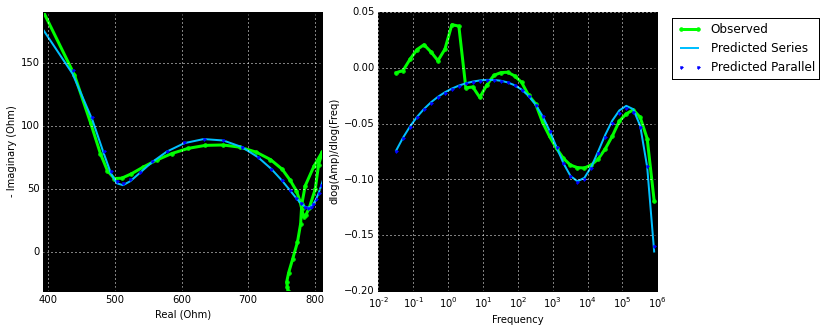

In [52]:
fig = plt.figure(figsize = (11, 5))
amp = np.sqrt(obs.real**2+obs.imag**2)
amp_predS = np.sqrt(predS.real**2+predS.imag**2)
amp_predP = np.sqrt(predP.real**2+predP.imag**2)

ax = plt.subplot(121)
ax1 = plt.subplot(122)
ax.patch.set_facecolor('black')
ax1.patch.set_facecolor('black')
ax.plot(obs.real, -obs.imag, 'lime', lw=3, marker=".", ms=8)
ax.plot(predS.real, -predS.imag, 'deepskyblue', lw=2)
ax.plot(predS.real, -predP.imag, 'b.')
ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp))/diff(np.log10(frequency)), 'lime', lw=3, marker=".", ms=8)
ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp_predS))/diff(np.log10(frequency)), 'deepskyblue', lw=2)
ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp_predP))/diff(np.log10(frequency)), 'b.', lw=2)
ax.set_xlim(obs.real.min(), obs.real.max())
ax.set_ylim((-obs.imag).min(), (-obs.imag).max())
ax.set_xlabel("Real (Ohm)")
ax.set_ylabel("- Imaginary (Ohm)")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("dlog(Amp)/dlog(Freq)")
ax.grid(True)
ax.yaxis.grid(True, which='minor')
plt.tick_params(axis='y', which='minor')
ax1.grid(True)
ax1.yaxis.grid(True, which='minor')
plt.tick_params(axis='y', which='minor')
leg = ax1.legend(("Observed", "Predicted Series", "Predicted Parallel"), fontsize = 12, bbox_to_anchor = (1.6, 1))